In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import rand_score
from kmodes.kprototypes import KPrototypes
import math
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import normalized_mutual_info_score

In [2]:
def Normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [3]:
def purity_score(y,label_pre):
    contingency_matrix = metrics.cluster.contingency_matrix(y,label_pre)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [4]:
def data_cat(data):
    object_type=data.select_dtypes(['object']).columns
    for feature in object_type:
        print(feature )
        print(data[feature ].value_counts())
        print('\n')

In [5]:
def prepare_data_kprototype(data):
    df_cat = data.copy()
    for col in list(df_cat.select_dtypes(['object']).columns):
        df_cat[col] = df_cat[col].astype('category').cat.codes
    X= data.drop('Type of Client', axis = 1)
    y_true= data['Type of Client'].values
    cat_Pos = [X.columns.get_loc(col) for col in list(X.select_dtypes('object').columns)]
    X=df_cat.drop('Type of Client', axis = 1)
    return X.values,y_true,cat_Pos    

In [6]:
def prepare_data_kmeans(data):
    customers = pd.get_dummies(data, columns=['country','returning','GImg1','GImg2','GImg3','PImg1','PImg3','PImg4','PImg5','Authoritative -anarchic ','TAudio1','TAudio2','TAudio3','QAudio1','QAudio2','QAudio3','Proxemics'])
    customers['sex'] = customers['sex'].astype('category').cat.codes
    X=customers.drop('Type of Client', axis = 1).values
    y_true= data['Type of Client'].values
    return X,y_true
    

In [7]:
data=pd.read_csv('non-verbal tourist data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [9]:
data_cat(data)

sex
F    38
M    35
Name: sex, dtype: int64


country
england      25
canada       18
germany       4
argentina     3
polish        3
scotland      3
italy         3
russia        3
spain         3
hungary       2
uruguay       1
brasil        1
colombia      1
chile         1
cuba          1
mexico        1
Name: country, dtype: int64


returning
yes    38
no     35
Name: returning, dtype: int64


GImg1
likes         50
indiferent    17
dislikes       6
Name: GImg1, dtype: int64


GImg2
likes         39
indiferent    22
dislikes      12
Name: GImg2, dtype: int64


GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: GImg3, dtype: int64


PImg1
likes         70
indiferent     3
Name: PImg1, dtype: int64


PImg2
likes    73
Name: PImg2, dtype: int64


PImg3
likes         45
dislikes      18
indiferent    10
Name: PImg3, dtype: int64


PImg4
likes         41
indiferent    17
dislikes      15
Name: PImg4, dtype: int64


PImg5
dislikes      70
?              2
in

In [10]:
data.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


In [11]:
data = data.replace('?', 'Unknown')
data['age']=Normalize(data['age'])
data['Tense - relaxed']=Normalize(data['Tense - relaxed'])
data['Hostile - friendly']=Normalize(data['Hostile - friendly'])
data=data.drop(['PImg2'], axis =1)

In [12]:
data.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,0.315789,uruguay,no,likes,indiferent,indiferent,likes,indiferent,indiferent,...,8,0.4,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,0.631579,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,0.0,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,0.017544,england,no,indiferent,indiferent,indiferent,likes,indiferent,likes,...,10,0.8,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,0.333333,canada,no,likes,dislikes,dislikes,likes,indiferent,indiferent,...,2,0.0,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,0.105263,hungary,no,indiferent,indiferent,indiferent,likes,indiferent,likes,...,9,0.4,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [13]:
miss_valu=['GImg3', 'PImg5', 'Authoritative -anarchic ']
for column in miss_valu:
    print(column)
    print(data[column].value_counts())
    print('\n')

GImg3
likes         41
indiferent    19
dislikes      12
Unknown        1
Name: GImg3, dtype: int64


PImg5
dislikes      70
Unknown        2
indiferent     1
Name: PImg5, dtype: int64


Authoritative -anarchic 
2          13
9           9
4           9
3           8
1           8
10          7
8           5
7           5
6           5
5           3
Unknown     1
Name: Authoritative -anarchic , dtype: int64




In [14]:
df_cat = data.copy()

In [15]:
for col in list(df_cat.select_dtypes(['object']).columns):
    df_cat[col] = df_cat[col].astype('category').cat.codes

In [16]:
df_cat.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,0,0.315789,15,0,2,1,2,1,1,1,...,8,0.4,2,0,0,1,0,0,0,0
1,1,0.631579,1,0,2,1,2,1,2,2,...,9,0.0,1,0,0,2,2,0,0,0
2,0,0.017544,6,0,1,1,2,1,1,2,...,1,0.8,2,0,0,2,0,0,0,0
3,1,0.333333,2,0,2,0,1,1,1,1,...,2,0.0,2,0,0,2,0,1,0,0
4,1,0.105263,8,0,1,1,2,1,1,2,...,9,0.4,2,0,0,2,1,0,0,0


In [17]:
data['Type of Client'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [18]:
corr_c = df_cat.corr()
corr_c.style.background_gradient(cmap='coolwarm').format(precision=2)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
sex,1.00,0.15,-0.18,0.04,-0.13,-0.14,-0.13,0.06,-0.06,-0.02,0.07,-0.04,0.00,-0.06,-0.03,-0.12,0.05,0.01,0.02,0.11,-0.05,-0.03
age,0.15,1.00,-0.29,0.32,0.30,0.23,0.27,-0.05,0.33,0.27,0.07,-0.40,-0.09,-0.27,-0.25,-0.16,0.03,0.07,-0.09,0.06,0.18,-0.20
country,-0.18,-0.29,1.00,-0.12,-0.19,-0.30,-0.25,0.01,-0.29,-0.33,0.16,0.37,-0.08,0.18,0.37,-0.12,-0.01,-0.28,-0.22,-0.03,-0.23,0.29
returning,0.04,0.32,-0.12,1.00,0.52,0.58,0.54,0.22,0.58,0.50,0.07,-0.50,-0.22,-0.30,-0.58,-0.02,0.34,0.37,0.05,0.19,0.11,-0.33
GImg1,-0.13,0.30,-0.19,0.52,1.00,0.60,0.64,0.30,0.80,0.66,-0.04,-0.57,-0.07,-0.40,-0.38,0.14,0.11,0.50,0.04,0.18,-0.16,-0.65
GImg2,-0.14,0.23,-0.30,0.58,0.60,1.00,0.84,0.29,0.69,0.63,0.03,-0.63,-0.03,-0.37,-0.74,0.13,0.18,0.46,0.07,0.10,0.27,-0.50
GImg3,-0.13,0.27,-0.25,0.54,0.64,0.84,1.00,0.27,0.68,0.63,0.12,-0.71,0.05,-0.35,-0.65,0.12,0.24,0.50,0.11,0.13,0.18,-0.55
PImg1,0.06,-0.05,0.01,0.22,0.30,0.29,0.27,1.00,0.25,0.26,-0.01,-0.20,0.03,-0.11,-0.15,0.10,0.11,0.34,-0.09,0.09,-0.08,-0.31
PImg3,-0.06,0.33,-0.29,0.58,0.80,0.69,0.68,0.25,1.00,0.73,-0.05,-0.62,-0.07,-0.36,-0.56,0.12,0.23,0.47,0.06,0.19,0.02,-0.58
PImg4,-0.02,0.27,-0.33,0.50,0.66,0.63,0.63,0.26,0.73,1.00,-0.05,-0.56,-0.13,-0.36,-0.55,0.04,0.01,0.39,0.16,0.13,-0.01,-0.63


In [19]:
X,y_true,catColumnsPos=prepare_data_kprototype(data)

Best run was number 1
Cluster initiation: 1
Best run was number 7
Cluster initiation: 2
Best run was number 8
Cluster initiation: 3
Best run was number 2
Cluster initiation: 4
Best run was number 6
Cluster initiation: 5
Best run was number 2
Cluster initiation: 6
Best run was number 4
Cluster initiation: 7
Best run was number 7
Cluster initiation: 8
Best run was number 5
Cluster initiation: 9


<function matplotlib.pyplot.show(close=None, block=None)>

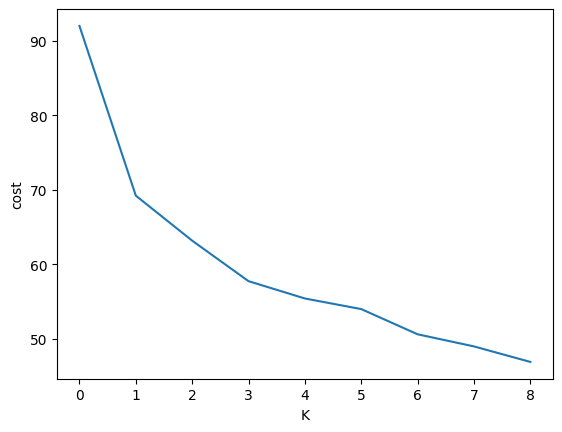

In [20]:
cost = []
for cluster in range(1,10):
    try:
        kprototype = KPrototypes(n_clusters = cluster, init='Huang',n_jobs=-1,verbose=1)
        kprototype.fit_predict(X, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [21]:
from kmodes.kprototypes import KPrototypes
kprototype = KPrototypes(n_clusters =6, init='Huang',n_jobs=-1,n_init=10,verbose=1)
label=kprototype.fit_predict(X, categorical = catColumnsPos)

Best run was number 2


In [22]:
ris = rand_score(y_true,label)
print(ris)

0.7321156773211568


In [23]:
print("Purity score for the clustered news: %0.2f%% "%(purity_score(y_true,label)*100))

Purity score for the clustered news: 68.49% 


In [24]:
def k_means(X, K, max_itr):
    samples, features = X.shape
    clusters = [[] for i in range(K)]
    random_sample = np.random.choice(samples, K, replace=False)
    means = [X[idx] for idx in random_sample]
    for i in range(max_itr):
        clusters = create_clusters(means, X, K)
        means_old = means
        means = get_means(clusters, K, features)
        if np.array_equal(means_old, means):
            break
    return clusters, means


def create_clusters(means, X, K):
    clusters = [[] for _ in range(K)]
    for sample in X:
        dist = [math.dist(sample, i) for i in means]
        centroid_idx = np.argmin(dist)
        clusters[centroid_idx].append(sample)
    return clusters     


def get_means(clusters, K, features):
    means = np.zeros((K, features))
    for idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(np.array(cluster), axis=0)
        means[idx] = cluster_mean
    return means  


def Wcss(clusters, means, K):
    wcss = 0
    for i in range(K):
        tmp = clusters[i]
        for j in tmp:
            wcss += (np.linalg.norm(j - means[i])) ** 2
    return wcss      


def _get_labels(x,means):
    labels = np.empty(len(x))
    for j in range(len(x)):
        dist = [math.dist(x[j], i) for i in means]
        labels[j] = np.argmin(dist)
    return labels

def plot_elbow(WCSS):
    K_array = np.arange(1, 10, 1)
    plt.plot(K_array, WCSS)
    plt.xlabel('Number of Clusters')
    plt.ylabel('within-cluster sums of squares (WCSS)')
    plt.title('Elbow method to determine optimum number of clusters')
    plt.show()


In [25]:
X_kmeans,y_true=prepare_data_kmeans(data)

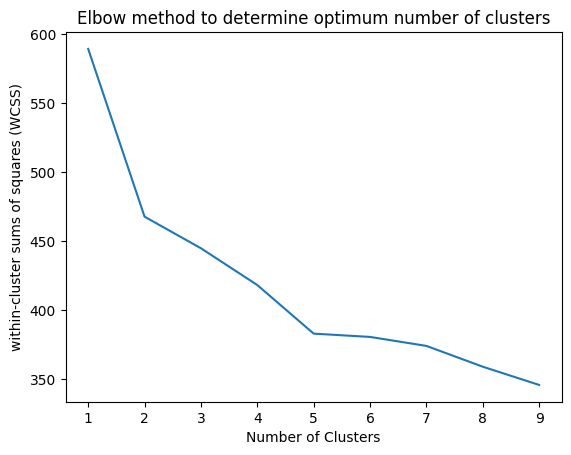

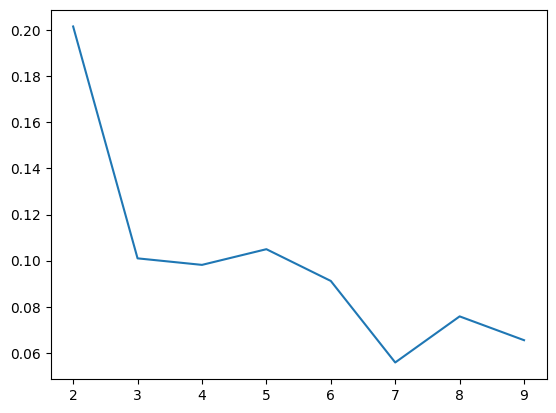

In [26]:
WCSS = []
silhouettes = []
for K in range(1,10):
    clusters, means = k_means(X_kmeans,K,100)
    WCSS.append(Wcss(clusters, means, K))
    if K !=1:
        y=_get_labels(X_kmeans,means) 
        silhouettes.append(silhouette_score(X_kmeans,y, metric = 'euclidean')) 
        
plot_elbow(WCSS)
plt.plot(range(2,10),silhouettes)
plt.show()

In [27]:
clusters, means = k_means(X_kmeans,6,500)
label_kmeans=_get_labels(X_kmeans,means) 

In [28]:
ris = rand_score(y_true,label_kmeans)
print(ris)

0.75


In [29]:
print("Purity score for the clustered news: %0.2f%% "%(purity_score(y_true,label_kmeans)*100))

Purity score for the clustered news: 72.60% 


In [30]:
from sklearn.feature_selection import chi2, RFE
from sklearn.feature_selection import SelectKBest

def chi_square(x, y, k):
    chi_2 = SelectKBest(chi2, k=k)
    X_k_best_features = chi_2.fit_transform(x, y)
    print(f'Chi-Square Features For K = {k}: {chi_2.get_feature_names_out()}')
    return X_k_best_features

In [31]:
x=df_cat[['country','GImg1','GImg2','GImg3','PImg1','PImg3','PImg4','PImg5','Authoritative -anarchic ','TAudio1','TAudio2','TAudio3','QAudio1','QAudio2','QAudio3','Proxemics']]
y=df_cat['returning']
chi_square(x, y,5)

Chi-Square Features For K = 5: ['GImg2' 'PImg3' 'PImg4' 'TAudio1' 'TAudio3']


array([[1, 1, 1, 2, 0],
       [1, 2, 2, 1, 0],
       [1, 1, 2, 2, 0],
       [0, 1, 1, 2, 0],
       [1, 1, 2, 2, 0],
       [2, 2, 2, 1, 0],
       [2, 1, 1, 1, 0],
       [2, 1, 2, 1, 0],
       [2, 1, 1, 2, 0],
       [2, 2, 2, 0, 1],
       [2, 2, 2, 0, 1],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 0, 1],
       [1, 2, 2, 0, 1],
       [2, 2, 2, 1, 0],
       [1, 2, 2, 1, 0],
       [2, 2, 1, 1, 1],
       [1, 2, 2, 1, 0],
       [2, 2, 0, 1, 1],
       [2, 2, 1, 1, 2],
       [2, 2, 2, 1, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 1, 0],
       [2, 2, 2, 1, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 1, 0],
       [2, 2, 2, 1, 0],
       [1, 2, 1, 1, 1],
       [2, 2, 2, 1, 0],
       [2, 2, 2, 1, 1],
       [2, 2, 2, 0, 1],
       [2, 2, 2, 0, 1],
       [2, 2, 2, 0, 1],
       [2, 2, 2, 0, 1],
       [1, 2, 2, 1, 0],
       [2, 2, 2, 1, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0],
       [2, 1, 2,

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
def ANOVA(x,y,k):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(x, y)
    selected_feature_index = selector.get_support(indices=True)
    selected_feature_name = x.columns[selected_feature_index]
    print("Selected feature:", selected_feature_name)
    

In [34]:
x=data[['age','Tense - relaxed','Hostile - friendly']]
y=data[['returning']]
ANOVA(x,y,3)

Selected feature: Index(['age', 'Tense - relaxed', 'Hostile - friendly'], dtype='object')


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
